In [1]:
import pandas as pd
import regex # needs to be installed with pip
import re
import string
from collections import Counter
from datetime import datetime
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from wordcloud import WordCloud
!pip install demoji
import demoji
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Ensemble Learning/Tweets/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [10]:
fig = px.bar(df.cyberbullying_type.value_counts(), color_discrete_sequence=px.colors.qualitative.Pastel1, custom_data=[df.cyberbullying_type.value_counts()])
fig.update_traces(hovertemplate='<br><b>Total: </b>%{customdata[0]}')
fig.update_layout(title='Cyberbullying types',
                 template='simple_white',
                 hovermode='x unified',
                 xaxis=dict(title='Type'),
                 yaxis=dict(title='Count'),
                 showlegend=False)
fig.show()

In [6]:
# introduce temporary column to seperate words
df["list_of_words"] = df['tweet_text'].apply(lambda x: x.split()) 
df.head()

,tweet_text,cyberbullying_type,list_of_words
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[In, other, words, #katandandre,, your, food, ..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[Why, is, #aussietv, so, white?, #MKR, #theblo..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,"[@XochitlSuckkks, a, classy, whore?, Or, more,..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"[@Jason_Gio, meh., :P, thanks, for, the, heads..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,"[@RudhoeEnglish, This, is, an, ISIS, account, ..."


In [7]:
# count length of tweet
df["characters per tweet"] = df['tweet_text'].apply(lambda x: len(x))
df["words_per_tweet"] = df['tweet_text'].apply(lambda x: len(x.split()))
df.head()

,tweet_text,cyberbullying_type,list_of_words,characters per tweet,words_per_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[In, other, words, #katandandre,, your, food, ...",61,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[Why, is, #aussietv, so, white?, #MKR, #theblo...",115,14
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,"[@XochitlSuckkks, a, classy, whore?, Or, more,...",60,9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"[@Jason_Gio, meh., :P, thanks, for, the, heads...",103,18
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,"[@RudhoeEnglish, This, is, an, ISIS, account, ...",103,18


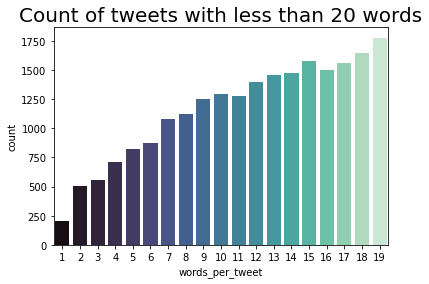

In [8]:
ax = sns.countplot(x="words_per_tweet", data=df[df['words_per_tweet']<20],palette = 'mako')
plt.title('Count of tweets with less than 20 words', fontsize=20)
plt.show()

In [ ]:
# identify word shape: 
# all upper
df["nb_upper"] = df["list_of_words"].apply(lambda x: sum(1 for c in x if c.isupper()))
# all lower
df["nb_lower"] = df["list_of_words"].apply(lambda x: sum(1 for c in x if c.islower()))

# capitalized  :first char upper, others lower 
count_capitalized  = lambda x: sum([(a[0].isupper() and a[1:].islower()) for a in x if len(a)>1])
df["nb_capitalized"] = df["list_of_words"].apply(count_capitalized)


# camelcase https://www.dictionary.com/browse/camelcase
# simplification = word element beginning with an uppercase letter that is not in nb_upper and not in
# nb_capitalized 
count_camel_case = lambda x: sum([(a[0].isupper() and
                                       (not a[1:].islower() and not a[1:].isupper())) for a in x if len(a)>1])
df["mixed_upper_lower_not_capitalized"] = df["list_of_words"].apply(count_camel_case)

# count how many words have the length x+1 for x in range(20)
for i in range(20):
    count_len = lambda x: sum([len(a)==i+1 for a in x])
    df[f"nb_len_{i+1}"] = df["list_of_words"].apply(count_len)
    
# remove the help column 
df.drop("list_of_words", axis=1,inplace=True)


In [ ]:
# df_all_orgas = df_all_orgas.reset_index(drop=True)

In [ ]:
df.head() 

,tweet_text,cyberbullying_type,characters per tweet,words_per_tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,nb_len_11,nb_len_12,nb_len_13,nb_len_14,nb_len_15,nb_len_16,nb_len_17,nb_len_18,nb_len_19,nb_len_20
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,0,2,0,0,0,0,0,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,1,9,1,0,0,2,...,1,0,0,1,1,0,0,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.columns

Index(['tweet_text', 'cyberbullying_type', 'characters per tweet',
       'words per tweet', 'nb_upper', 'nb_lower', 'nb_capitalized',
       'mixed_upper_lower_not_capitalized', 'nb_len_1', 'nb_len_2', 'nb_len_3',
       'nb_len_4', 'nb_len_5', 'nb_len_6', 'nb_len_7', 'nb_len_8', 'nb_len_9',
       'nb_len_10', 'nb_len_11', 'nb_len_12', 'nb_len_13', 'nb_len_14',
       'nb_len_15', 'nb_len_16', 'nb_len_17', 'nb_len_18', 'nb_len_19',
       'nb_len_20'],
      dtype='object')

In [ ]:
df['tweet_text'] = df['tweet_text'].str.lower()

In [ ]:
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z",
           str(0),"1","2","3","4","5","6","7","8","9","?","!","@","$","&","#","%","(",")","-","+","=","/"]

In [ ]:
lst = []
for index, row in df.iterrows(): 
    chars_in_string = Counter(row["tweet_text"])
    res = []
    for letter in letters:
        if letter in chars_in_string:
            res.append(chars_in_string[letter])
        else: 
            res.append(0) 
    lst.append(res)

df_temp = pd.DataFrame(lst, columns=letters, index=df.index)

In [ ]:
df_temp.head()

,a,b,c,d,e,f,g,h,i,j,...,$,&,#,%,(,),-,+,=,/
0,5,0,2,4,2,1,0,1,4,0,...,0,0,2,0,0,0,0,0,0,0
1,5,3,3,4,10,0,1,4,8,0,...,0,0,10,0,0,0,0,0,0,0
2,3,0,5,1,6,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,2,2,4,8,1,2,5,2,1,...,0,0,0,0,0,0,0,0,0,0
4,6,1,4,3,7,0,2,4,12,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.join(df_temp)

In [ ]:
df.head()

,tweet_text,cyberbullying_type,characters per tweet,words_per_tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,$,&,#,%,(,),-,+,=,/
0,"in other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,0,2,0,0,0,0,0,0,0
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying,115,14,1,9,1,0,0,2,...,0,0,10,0,0,0,0,0,0,0
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lst = []

for index, row in df.iterrows(): 
    non_ASCII = 0
    for c in row["tweet_text"]:
        if 0 <= ord(c) <= 127:
            pass
        else:
            non_ASCII += 1
            # this is a non-ascii character.
     
    lst.append(non_ASCII)

df_temp = pd.DataFrame({'non_ASCII':lst},index=df.index)

In [ ]:
df_temp.head()

,non_ASCII
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = df.join(df_temp)

In [ ]:
df.head(20)

,tweet_text,cyberbullying_type,characters per tweet,words_per_tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,&,#,%,(,),-,+,=,/,non_ASCII
0,"in other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,2,0,0,0,0,0,0,0,0
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying,115,14,1,9,1,0,0,2,...,0,10,0,0,0,0,0,0,0,0
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,0,0,0,0,0,0,0
5,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying,131,23,0,20,1,0,0,7,...,0,0,0,0,0,0,0,0,0,0
6,itu sekolah ya bukan tempat bully! ga jauh kay...,not_cyberbullying,54,10,0,8,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7,karma. i hope it bites kat on the butt. she is...,not_cyberbullying,63,14,1,10,3,0,1,3,...,0,1,0,0,0,0,0,0,0,0
8,@stockputout everything but mostly my priest,not_cyberbullying,44,6,0,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,rebecca black drops out of school due to bully...,not_cyberbullying,50,9,0,2,7,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/Ensemble Learning/Tweets/style_data.csv')

In [ ]:
df.shape

(47692, 78)

In [ ]:
df_all_orgas["0"].head()

1340367556947943425    5
1340329823282016256    2
1340307168923414531    1
1340141062724194306    0
1340065561523458048    0
Name: 0, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Exploratory Data Analysis**

In [ ]:
# For lemmatize word
lemma = WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['im', 'wa', 'p', 't', 's', 'o', 'e', 'like'])

def clean_text(text):
    
    # Remove Hashtag, Mention, https, www.asdfd, dsfadsf.com
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    # Make all text lowercase
    text = text.lower()
    
    # Lemmatize word
    text = " ".join([lemma.lemmatize(word) for word in text.split()])
    
    # Remove Punctuation
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    # Remove stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # Convert emoji to word
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text


df['tweet_text'] = df.tweet_text.apply(lambda text: clean_text(text))
df.head()

,tweet_text,cyberbullying_type
0,word food crapilicious,not_cyberbullying
1,white,not_cyberbullying
2,classy whore red velvet cupcake,not_cyberbullying
3,gio meh thanks head concerned another angry du...,not_cyberbullying
4,isi account pretending kurdish account islam lie,not_cyberbullying


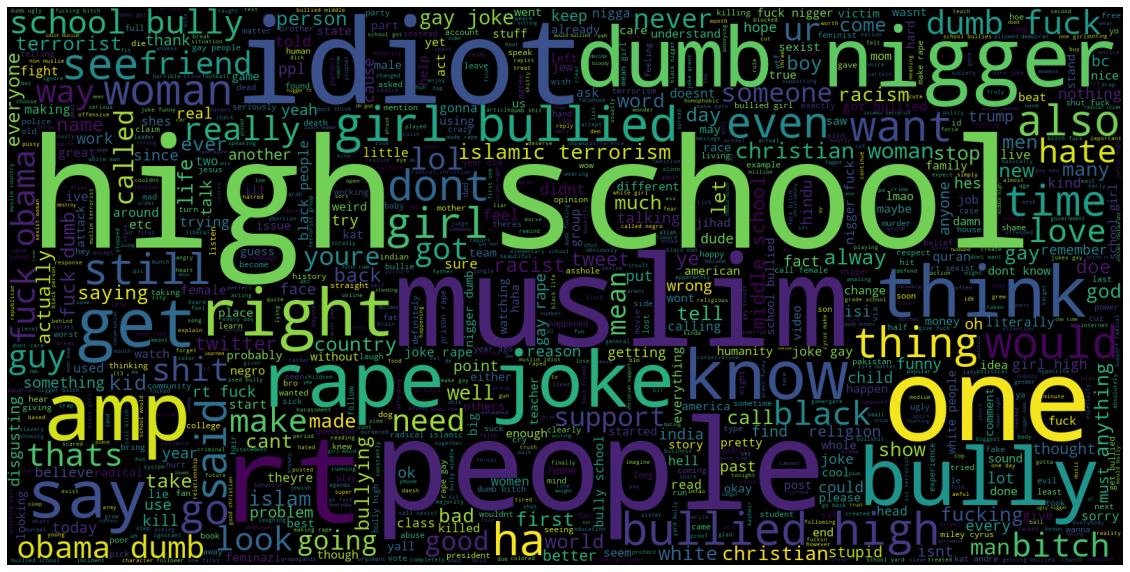

In [ ]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=1000, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(df.tweet_text)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
for cyber_type in df.cyberbullying_type.unique():
    
    top50_word = df.tweet_text[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:10]
    fig = sns.barplot(x="Text", y="count", data=gender_2,palette = 'mako')
    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    
    fig.update_layout(title=f"Top 50 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

bullying    657
bully       382
dont        371
school      365
get         353
kat         289
people      274
one         268
amp         257
go          246
dtype: int64


joke      5232
rape      4047
gay       3885
woman     1168
call      1109
female    1058
bitch     1024
people     993
sexist     957
make       950
dtype: int64


muslim       4585
idiot        3024
christian    2006
u            1942
terrorist    1329
right        1292
islamic      1237
woman        1218
terrorism    1099
radical      1076
dtype: int64


bully      531
dont       475
people     428
get        384
fucking    370
know       300
think      278
u          265
idiot      265
one        254
dtype: int64


school     8480
high       4938
girl       4594
bullied    4358
bully      4279
one        1041
people      925
got         823
kid         796
get         785
dtype: int64


fuck      5359
dumb      5140
nigger    5083
black     2123
u         2114
white     1559
people    1174
obama     1101
one       1063
ur         994
dtype: int64


In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

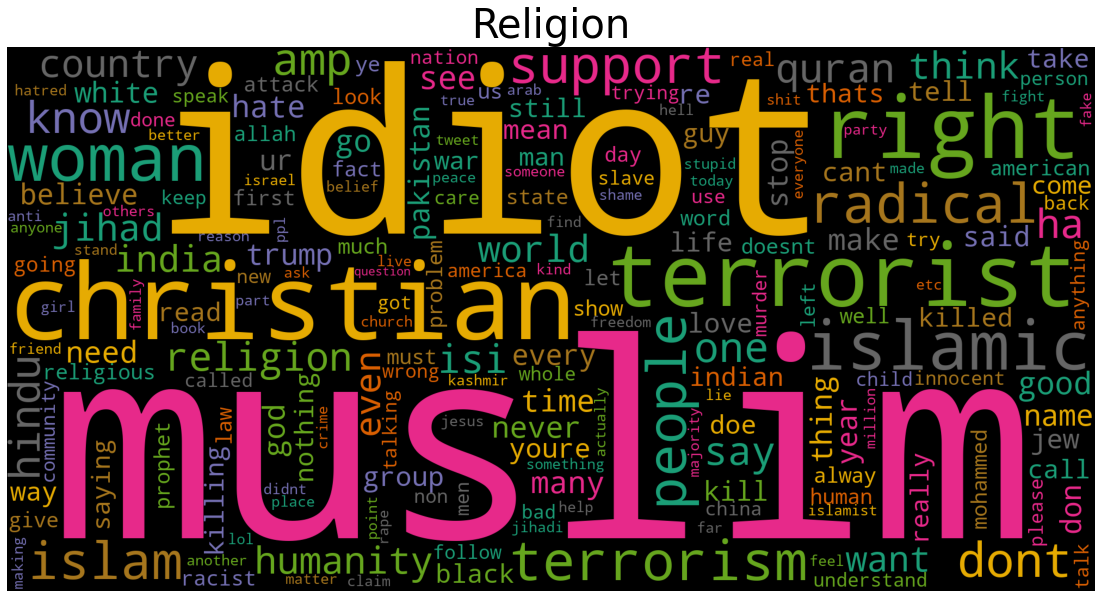

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='religion']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud1)

In [ ]:
text_gender

array(['rape nema joke drunk gay one choice sensitivity coming',
       'never saw celebrity say anything obama b maher incest rape joke colbert gay joke k griffin beheading joke',
       'mean hes gay us gendered slur make rape joke', ...,
       'suck smile wiped face huh kat glass house throw stones',
       'said woman choose gay men dont made rape jokes told hg go kill perpetrated gay stereotypes frankie cody',
       'rt cant convince three teen woman take computer science meanwhile isi soooo christian grey righ…'],
      dtype=object)

In [ ]:
unigrams = get_top_n_gram(text_gender,(1,1),10)
bigrams = get_top_n_gram(text_gender,(2,2),10)

#gender_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
#gender_1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    #kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Unigrams',orientation='h')

gender_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
#gender_2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    #kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Bigrams',orientation='h')
gender_2

,Text,count
0,christian woman,808
1,islamic terrorism,806
2,radical islamic,209
3,muslim idiot,119
4,support radical,113
5,muslim country,108
6,radical christian,105
7,good christian,105
8,christian support,83
9,radical islam,82


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

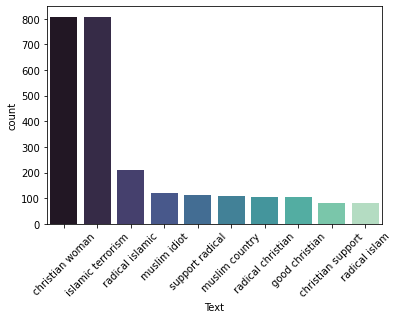

In [ ]:
ax = sns.barplot(x="Text", y="count", data=gender_2,palette = 'mako')
plt.xticks(rotation = 45)